<a href="https://colab.research.google.com/github/ilunsenody-source/enody/blob/main/prediction_maison1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importation des bibliotheque


In [101]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn.metrics import root_mean_squared_error, mean_absolute_error

# 2.Changement des donnes

In [102]:
df = pd.read_excel('maison_prix.xlsx')
df.head()

,Superficie,Nombre de chambre,Quartier,Type_maison,Prix
0,7,2,RVA,moyen,50
1,25,6,latin,elementaire,400
2,8,1,Musonoie,moyen,25
3,30,4,jolie cite,moyen,200
4,20,3,kasulu,moyen,60


In [103]:
df.shape

(19, 5)

In [104]:
df.isna
df.isna().sum()

,0
Superficie,0
Nombre de chambre,0
Quartier,0
Type_maison,0
Prix,0


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Superficie         19 non-null     int64 
 1   Nombre de chambre  19 non-null     int64 
 2   Quartier           19 non-null     object
 3   Type_maison        19 non-null     object
 4   Prix               19 non-null     object
dtypes: int64(2), object(3)
memory usage: 892.0+ bytes


In [106]:


#Convertir le prix en numerique
df['Prix'] = pd.to_numeric(df['Prix'], errors='coerce')

In [107]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Superficie,19.0,111.578947,139.481307,7.0,30.0,50.0,100.0,500.0
Nombre de chambre,19.0,6.263158,10.733344,1.0,3.0,3.0,5.5,50.0
Prix,18.0,266.388889,196.617018,25.0,150.0,265.0,337.5,900.0


# Calculerla mediane

In [108]:
median = df['Prix'].median()
print(median)

265.0


In [109]:
df['Prix'].fillna(median,inplace=True)

/tmp/ipython-input-1085329563.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Prix'].fillna(median,inplace=True)


#  2.2 Analyse univariate

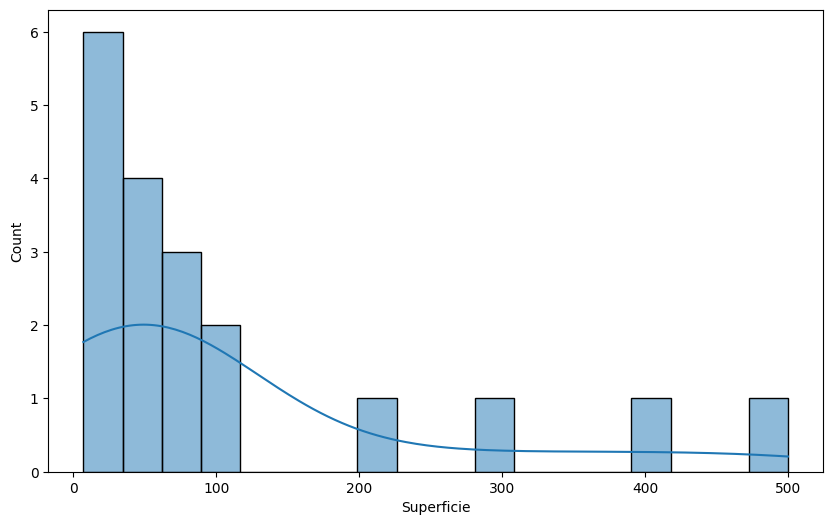

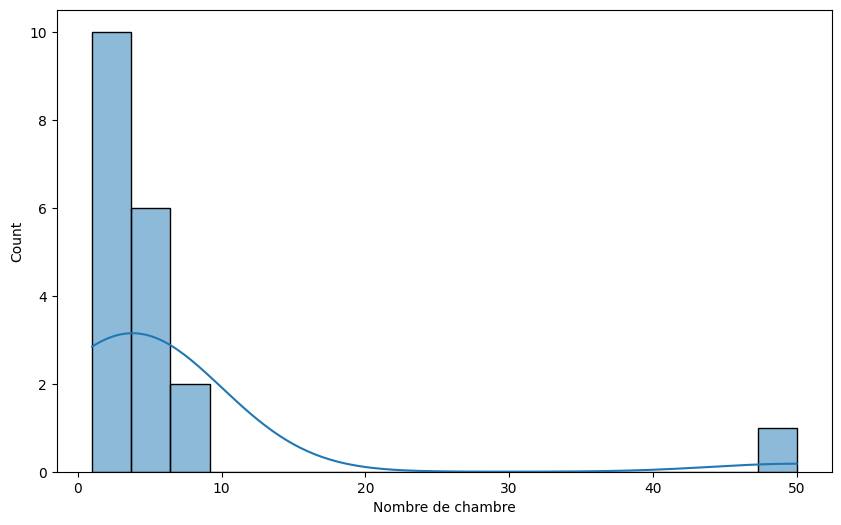

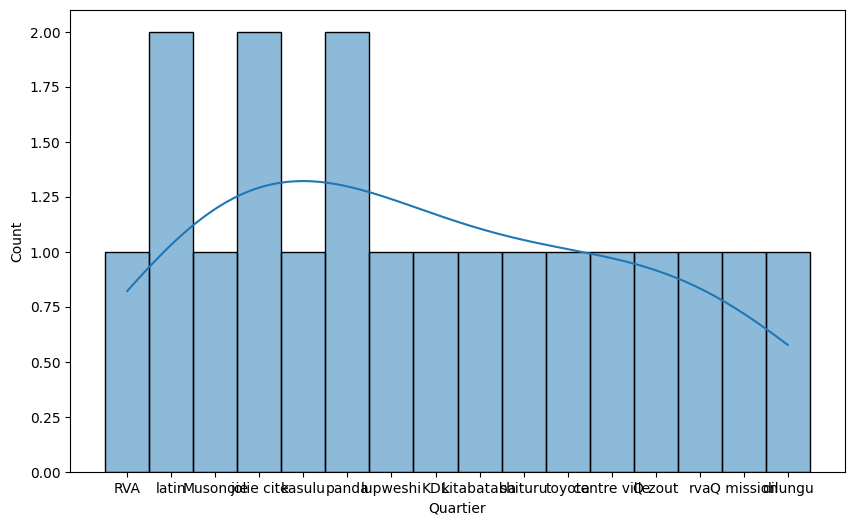

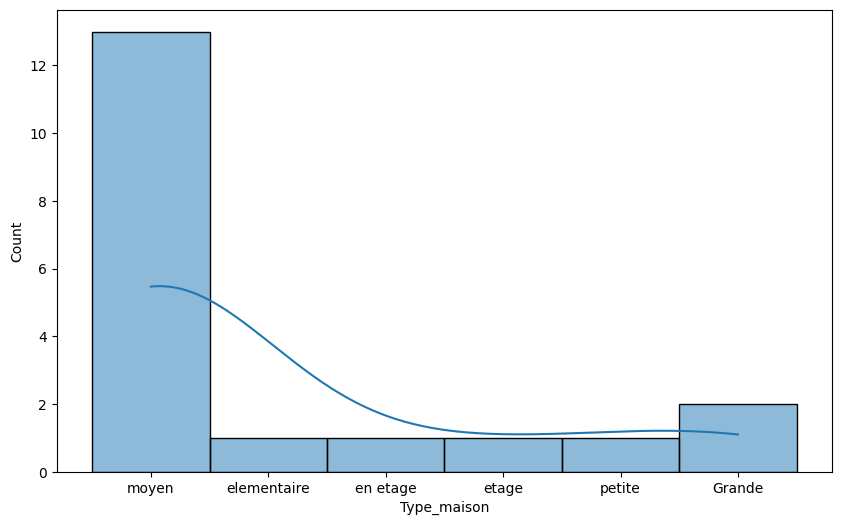

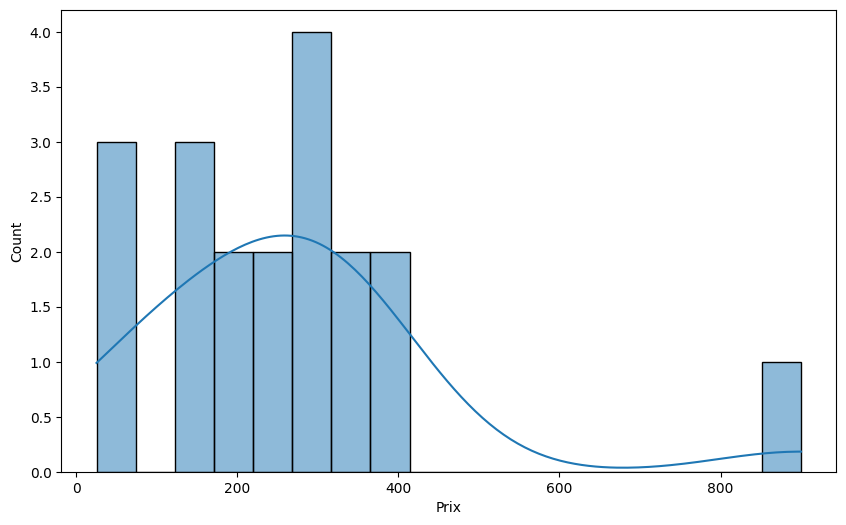

In [110]:
for cal in df.columns:
  plt.figure(figsize=(10,6))
  sns.histplot(data=df,x= cal,kde=True,bins= 18)
plt.show()

# 2.2.2 Encodeur des variable des categorielles

In [111]:
label_encoder = LabelEncoder()
df['Quartier'] = label_encoder.fit_transform(df['Quartier'])
dummy_df = pd.get_dummies(df['Quartier'],drop_first=False, prefix='Quartier')
dummy_df = pd.get_dummies(df['Type_maison'],drop_first=False, prefix='Type_maison')

In [112]:
df = pd.concat([df,dummy_df],axis=1)
df.head()

,Superficie,Nombre de chambre,Quartier,Type_maison,Prix,Type_maison_Grande,Type_maison_elementaire,Type_maison_en etage,Type_maison_etage,Type_maison_moyen,Type_maison_petite
0,7,2,4,moyen,50.0,False,False,False,False,True,False
1,25,6,10,elementaire,400.0,False,True,False,False,False,False
2,8,1,1,moyen,25.0,False,False,False,False,True,False
3,30,4,7,moyen,200.0,False,False,False,False,True,False
4,20,3,8,moyen,60.0,False,False,False,False,True,False


In [113]:
target=df['Prix']
features=df.drop(columns=['Prix','Quartier','Type_maison'])

# Matrice de correction

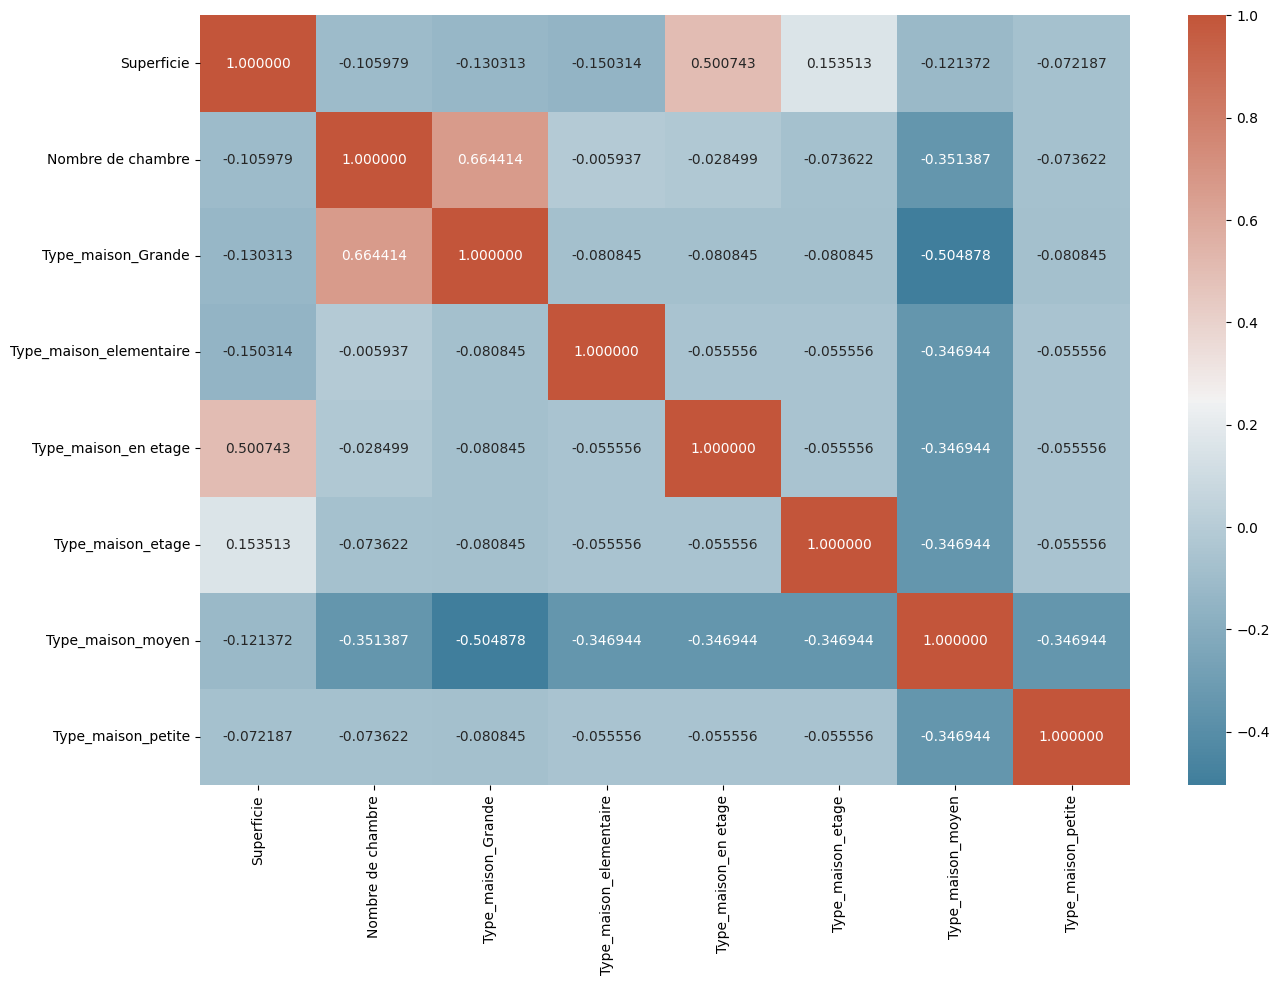

In [114]:
plt.figure(figsize=(15,10))
cmap=sns.diverging_palette(230,20,as_cmap=True)
sns.heatmap(features.corr(),annot=True, fmt='2f',cmap=cmap)
plt.show()

# 3.Creation du modele de regression lineare\

## 2.1 Divise notre dataset

In [115]:
x_train,x_test,y_train,y_test=train_test_split(features,target,test_size=0.5,random_state=22)

In [122]:
#Creation du model de regression lineaire
lr_model = linear_model.LinearRegression()
#Entrainer le model de regression lineaire
lr_model.fit(x_train,y_train)

LinearRegression()

# 2.2 prediction

In [123]:
train_prediction=lr_model.predict(x_train)


In [124]:
train_prediction

array([179.28077254, 185.13967183, 899.49312264, 250.50687736,
       155.76360167, 156.99759192, 141.57018444, 215.21941963,
       156.02875798])

In [125]:
print("Le r2_score est de :", r2_score(y_train,train_prediction))

Le r2_score est de : 0.8966327335004365


# 3.3 Test sur les donnee

In [126]:
train_prediction=lr_model.predict(x_test)

In [127]:
r2=r2_score(y_test,train_prediction)
print(f'R2 et de : {r2}')

R2 et de : -0.04073603631922462


In [135]:
print("Le RMSE est de :", root_mean_squared_error(y_test,train_prediction))

Le RMSE est de : 117.61132028303574


In [136]:
print("Le RMSE est de :", mean_absolute_error(y_test,train_prediction))

Le RMSE est de : 101.65016324884697
